In [1]:
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [3]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

iris_df = sklearn_to_df(iris)
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


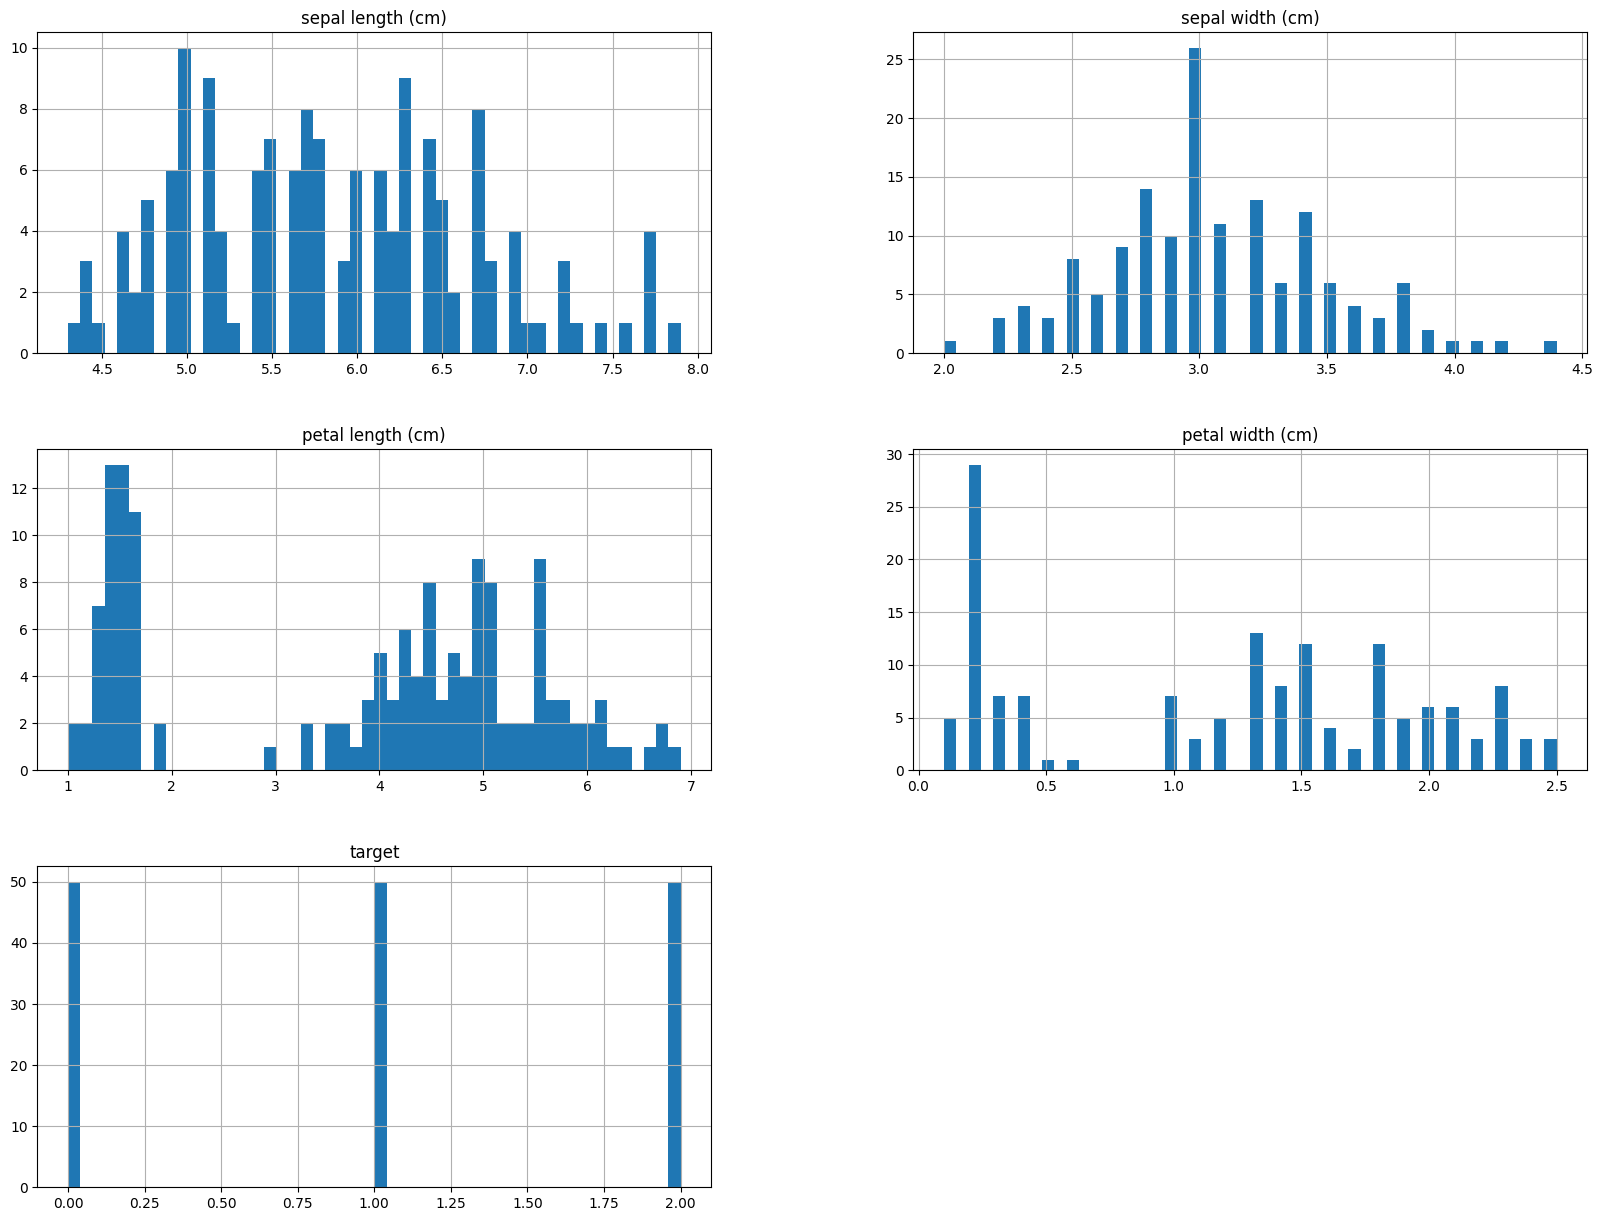

In [4]:
import matplotlib.pyplot as plt
iris_df.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
#normalizing and spliting data
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.85, random_state=1, stratify=Y)


In [6]:
#using default estimator - decision tree
clf = AdaBoostClassifier(n_estimators=100, random_state=1)
clf.fit(X_train, Y_train)
metrics.accuracy_score(Y_test, clf.predict(X_test))


0.8695652173913043

In [7]:
#hyperparameter tuning
ada = AdaBoostClassifier(random_state=1)

parameters = {'n_estimators':[10*x for x in range(2,50,2)], 'learning_rate':[1, 0.1, 0.01, 0.001]}
clf_gs = GridSearchCV(estimator=ada, param_grid=parameters, n_jobs=-1, verbose=4, scoring='f1_weighted', refit=True)

clf_gs.fit(X_train, Y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 4/5] END ..learning_rate=1, n_estimators=20;, score=0.960 total time=   0.1s
[CV 2/5] END ..learning_rate=1, n_estimators=40;, score=0.923 total time=   0.2s
[CV 1/5] END ..learning_rate=1, n_estimators=60;, score=1.000 total time=   0.3s
[CV 5/5] END ..learning_rate=1, n_estimators=60;, score=1.000 total time=   0.2s
[CV 4/5] END ..learning_rate=1, n_estimators=80;, score=0.960 total time=   0.3s
[CV 3/5] END .learning_rate=1, n_estimators=100;, score=0.793 total time=   0.4s
[CV 1/5] END .learning_rate=1, n_estimators=120;, score=1.000 total time=   0.7s
[CV 5/5] END .learning_rate=1, n_estimators=120;, score=1.000 total time=   0.7s
[CV 4/5] END .learning_rate=1, n_estimators=140;, score=0.960 total time=   0.8s
[CV 3/5] END .learning_rate=1, n_estimators=160;, score=0.793 total time=   1.1s
[CV 2/5] END .learning_rate=1, n_estimators=180;, score=0.923 total time=   1.0s
[CV 1/5] END .learning_rate=1, n_estimators=200

GridSearchCV(estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [1, 0.1, 0.01, 0.001],
                         'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160,
                                          180, 200, 220, 240, 260, 280, 300,
                                          320, 340, 360, 380, 400, 420, 440,
                                          460, 480]},
             scoring='f1_weighted', verbose=4)

In [8]:
Y_pred = clf_gs.best_estimator_.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred)

0.8695652173913043

In [9]:
# using different base_estimator - logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
ada_log = AdaBoostClassifier(estimator=logreg, random_state=1)

parameters = {'n_estimators':[10*x for x in range(4,50,2)], 'learning_rate':[1, 0.1, 0.01, 0.001]}
clflog_gs = GridSearchCV(estimator=ada_log, param_grid=parameters, n_jobs=-1, verbose=4, scoring='f1_weighted', refit=True)

clflog_gs.fit(X_train, Y_train)


Fitting 5 folds for each of 92 candidates, totalling 460 fits

[CV 1/5] END learning_rate=0.001, n_estimators=80;, score=1.000 total time=   0.5s
[CV 1/5] END learning_rate=0.001, n_estimators=100;, score=1.000 total time=   0.5s
[CV 1/5] END learning_rate=0.001, n_estimators=120;, score=1.000 total time=   0.6s
[CV 5/5] END learning_rate=0.001, n_estimators=120;, score=0.960 total time=   0.6s
[CV 4/5] END learning_rate=0.001, n_estimators=140;, score=0.918 total time=   0.6s
[CV 3/5] END learning_rate=0.001, n_estimators=160;, score=0.793 total time=   0.7s
[CV 2/5] END learning_rate=0.001, n_estimators=180;, score=0.923 total time=   0.7s
[CV 1/5] END learning_rate=0.001, n_estimators=200;, score=1.000 total time=   0.8s
[CV 5/5] END learning_rate=0.001, n_estimators=200;, score=0.960 total time=   0.9s
[CV 4/5] END learning_rate=0.001, n_estimators=220;, score=0.918 total time=   1.0s
[CV 3/5] END learning_rate=0.001, n_estimators=240;, score=0.793 total time=   1.0s
[CV 2/5] END l

GridSearchCV(estimator=AdaBoostClassifier(estimator=LogisticRegression(),
                                          random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [1, 0.1, 0.01, 0.001],
                         'n_estimators': [40, 60, 80, 100, 120, 140, 160, 180,
                                          200, 220, 240, 260, 280, 300, 320,
                                          340, 360, 380, 400, 420, 440, 460,
                                          480]},
             scoring='f1_weighted', verbose=4)

In [10]:
Y_pred = clflog_gs.best_estimator_.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred)

0.8260869565217391